In [1]:
import pandas as pd    
import numpy as np          
import seaborn as sns          
import matplotlib.pyplot as plt     
import warnings                 
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\Subscription_Service.csv")

In [7]:
df.head()

,user_id,signup_date,subscription_plan,monthly_fee,usage_hours,active_months,auto_renew,region,customer_support_calls,last_active_date,churned,churn_reason,monthly_revenue,discount_percent,final_payment
0,U100000,2025-01-13,Standard,499,4.1,8,Yes,Gujarat,4,2025-09-13,1,Low Usage,499,8,459.08
1,U100001,2024-05-10,Premium,799,26.7,11,Yes,Telangana,0,2025-10-01,0,NaN,799,11,711.11
2,U100002,2024-08-18,Basic,299,12.6,11,Yes,Gujarat,2,2025-10-01,0,NaN,299,0,299.00
3,U100003,2023-09-03,Standard,499,19.8,10,No,Gujarat,0,2025-10-01,0,NaN,499,8,459.08
4,U100004,2024-12-05,Basic,299,0.0,9,Yes,Tamil Nadu,2,2025-10-01,0,NaN,299,9,272.09


In [9]:
df.tail()

,user_id,signup_date,subscription_plan,monthly_fee,usage_hours,active_months,auto_renew,region,customer_support_calls,last_active_date,churned,churn_reason,monthly_revenue,discount_percent,final_payment
8995,U108995,2023-01-29,Premium,799,30.4,10,Yes,Telangana,0,2025-10-01,0,NaN,799,4,767.04
8996,U108996,2025-03-20,Premium,799,33.7,10,No,Gujarat,0,2026-01-20,1,High Price,799,7,743.07
8997,U108997,2025-03-04,Standard,499,18.2,15,Yes,Tamil Nadu,1,2025-10-01,0,NaN,499,7,464.07
8998,U108998,2023-05-09,Premium,799,25.4,14,No,Tamil Nadu,0,2024-07-09,1,High Price,799,1,791.01
8999,U108999,2025-05-29,Basic,299,15.4,5,No,Tamil Nadu,2,2025-10-01,0,NaN,299,0,299.00


In [11]:
df.shape

(9000, 15)

In [15]:
df.columns

Index(['user_id', 'signup_date', 'subscription_plan', 'monthly_fee',
       'usage_hours', 'active_months', 'auto_renew', 'region',
       'customer_support_calls', 'last_active_date', 'churned', 'churn_reason',
       'monthly_revenue', 'discount_percent', 'final_payment'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 9000 non-null   object 
 1   signup_date             9000 non-null   object 
 2   subscription_plan       9000 non-null   object 
 3   monthly_fee             9000 non-null   int64  
 4   usage_hours             9000 non-null   float64
 5   active_months           9000 non-null   int64  
 6   auto_renew              9000 non-null   object 
 7   region                  9000 non-null   object 
 8   customer_support_calls  9000 non-null   int64  
 9   last_active_date        9000 non-null   object 
 10  churned                 9000 non-null   int64  
 11  churn_reason            3402 non-null   object 
 12  monthly_revenue         9000 non-null   int64  
 13  discount_percent        9000 non-null   int64  
 14  final_payment           9000 non-null   

In [19]:
df.isnull().sum()

user_id                      0
signup_date                  0
subscription_plan            0
monthly_fee                  0
usage_hours                  0
active_months                0
auto_renew                   0
region                       0
customer_support_calls       0
last_active_date             0
churned                      0
churn_reason              5598
monthly_revenue              0
discount_percent             0
final_payment                0
dtype: int64

In [21]:
df['churn_reason'] = df['churn_reason'].fillna('Unknown')

In [23]:
df.isnull().sum()

user_id                   0
signup_date               0
subscription_plan         0
monthly_fee               0
usage_hours               0
active_months             0
auto_renew                0
region                    0
customer_support_calls    0
last_active_date          0
churned                   0
churn_reason              0
monthly_revenue           0
discount_percent          0
final_payment             0
dtype: int64

In [25]:
df.describe()

,monthly_fee,usage_hours,active_months,customer_support_calls,churned,monthly_revenue,discount_percent,final_payment
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,472.633333,16.495756,9.892889,1.214889,0.378000,472.633333,4.421889,451.520330
std,190.347467,9.005575,3.728876,1.367328,0.484915,190.347467,3.561675,182.301257
min,299.000000,0.000000,1.000000,0.000000,0.000000,299.000000,0.000000,245.180000
25%,299.000000,9.800000,7.000000,0.000000,0.000000,299.000000,1.000000,290.030000
50%,499.000000,15.600000,10.000000,1.000000,0.000000,499.000000,4.000000,459.080000
75%,499.000000,22.600000,12.000000,2.000000,1.000000,499.000000,7.000000,499.000000
max,799.000000,49.100000,23.000000,10.000000,1.000000,799.000000,23.000000,799.000000


In [27]:
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True)
df['last_active_date'] = pd.to_datetime(df['last_active_date'], dayfirst=True)

In [29]:
print(df['signup_date'].dtypes)
print(df['last_active_date'].dtypes)

datetime64[ns]
datetime64[ns]


In [31]:
df.describe()

,signup_date,monthly_fee,usage_hours,active_months,customer_support_calls,last_active_date,churned,monthly_revenue,discount_percent,final_payment
count,9000,9000.000000,9000.000000,9000.000000,9000.000000,9000,9000.000000,9000.000000,9000.000000,9000.000000
mean,2024-05-15 01:33:26.400000,472.633333,16.495756,9.892889,1.214889,2025-07-14 12:06:14.400000,0.378000,472.633333,4.421889,451.520330
min,2023-01-01 00:00:00,299.000000,0.000000,1.000000,0.000000,2023-02-12 00:00:00,0.000000,299.000000,0.000000,245.180000
25%,2023-09-09 00:00:00,299.000000,9.800000,7.000000,0.000000,2025-08-06 18:00:00,0.000000,299.000000,1.000000,290.030000
50%,2024-05-18 00:00:00,499.000000,15.600000,10.000000,1.000000,2025-10-01 00:00:00,0.000000,499.000000,4.000000,459.080000
75%,2025-01-18 00:00:00,499.000000,22.600000,12.000000,2.000000,2025-10-01 00:00:00,1.000000,499.000000,7.000000,499.000000
max,2025-09-26 00:00:00,799.000000,49.100000,23.000000,10.000000,2027-03-08 00:00:00,1.000000,799.000000,23.000000,799.000000
std,NaN,190.347467,9.005575,3.728876,1.367328,NaN,0.484915,190.347467,3.561675,182.301257


In [33]:
df.drop(columns='user_id', axis=1, inplace=True)
df.drop(columns=['signup_date','last_active_date'], axis=1, inplace=True)

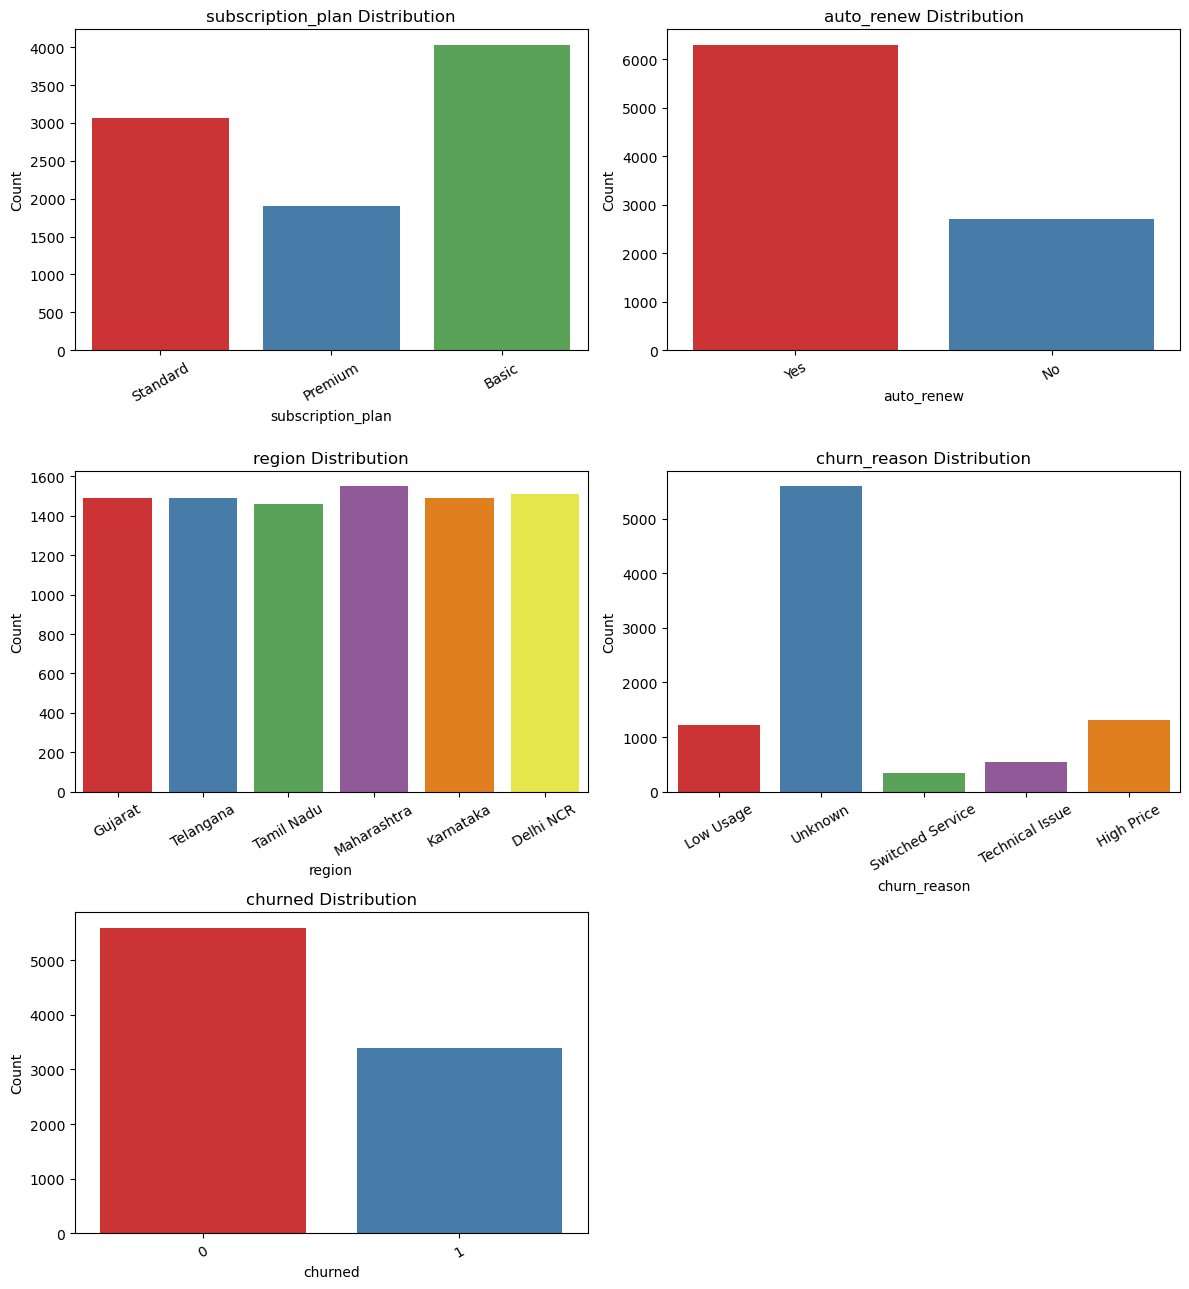

In [37]:
cat_col = ['subscription_plan', 'auto_renew', 'region', 'churn_reason', 'churned']

plt.figure(figsize=(12, 13))
for i, col in enumerate(cat_col, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, palette='Set1')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [47]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['monthly_fee', 'usage_hours', 'active_months', 'customer_support_calls',
       'churned', 'monthly_revenue', 'discount_percent', 'final_payment'],
      dtype='object')

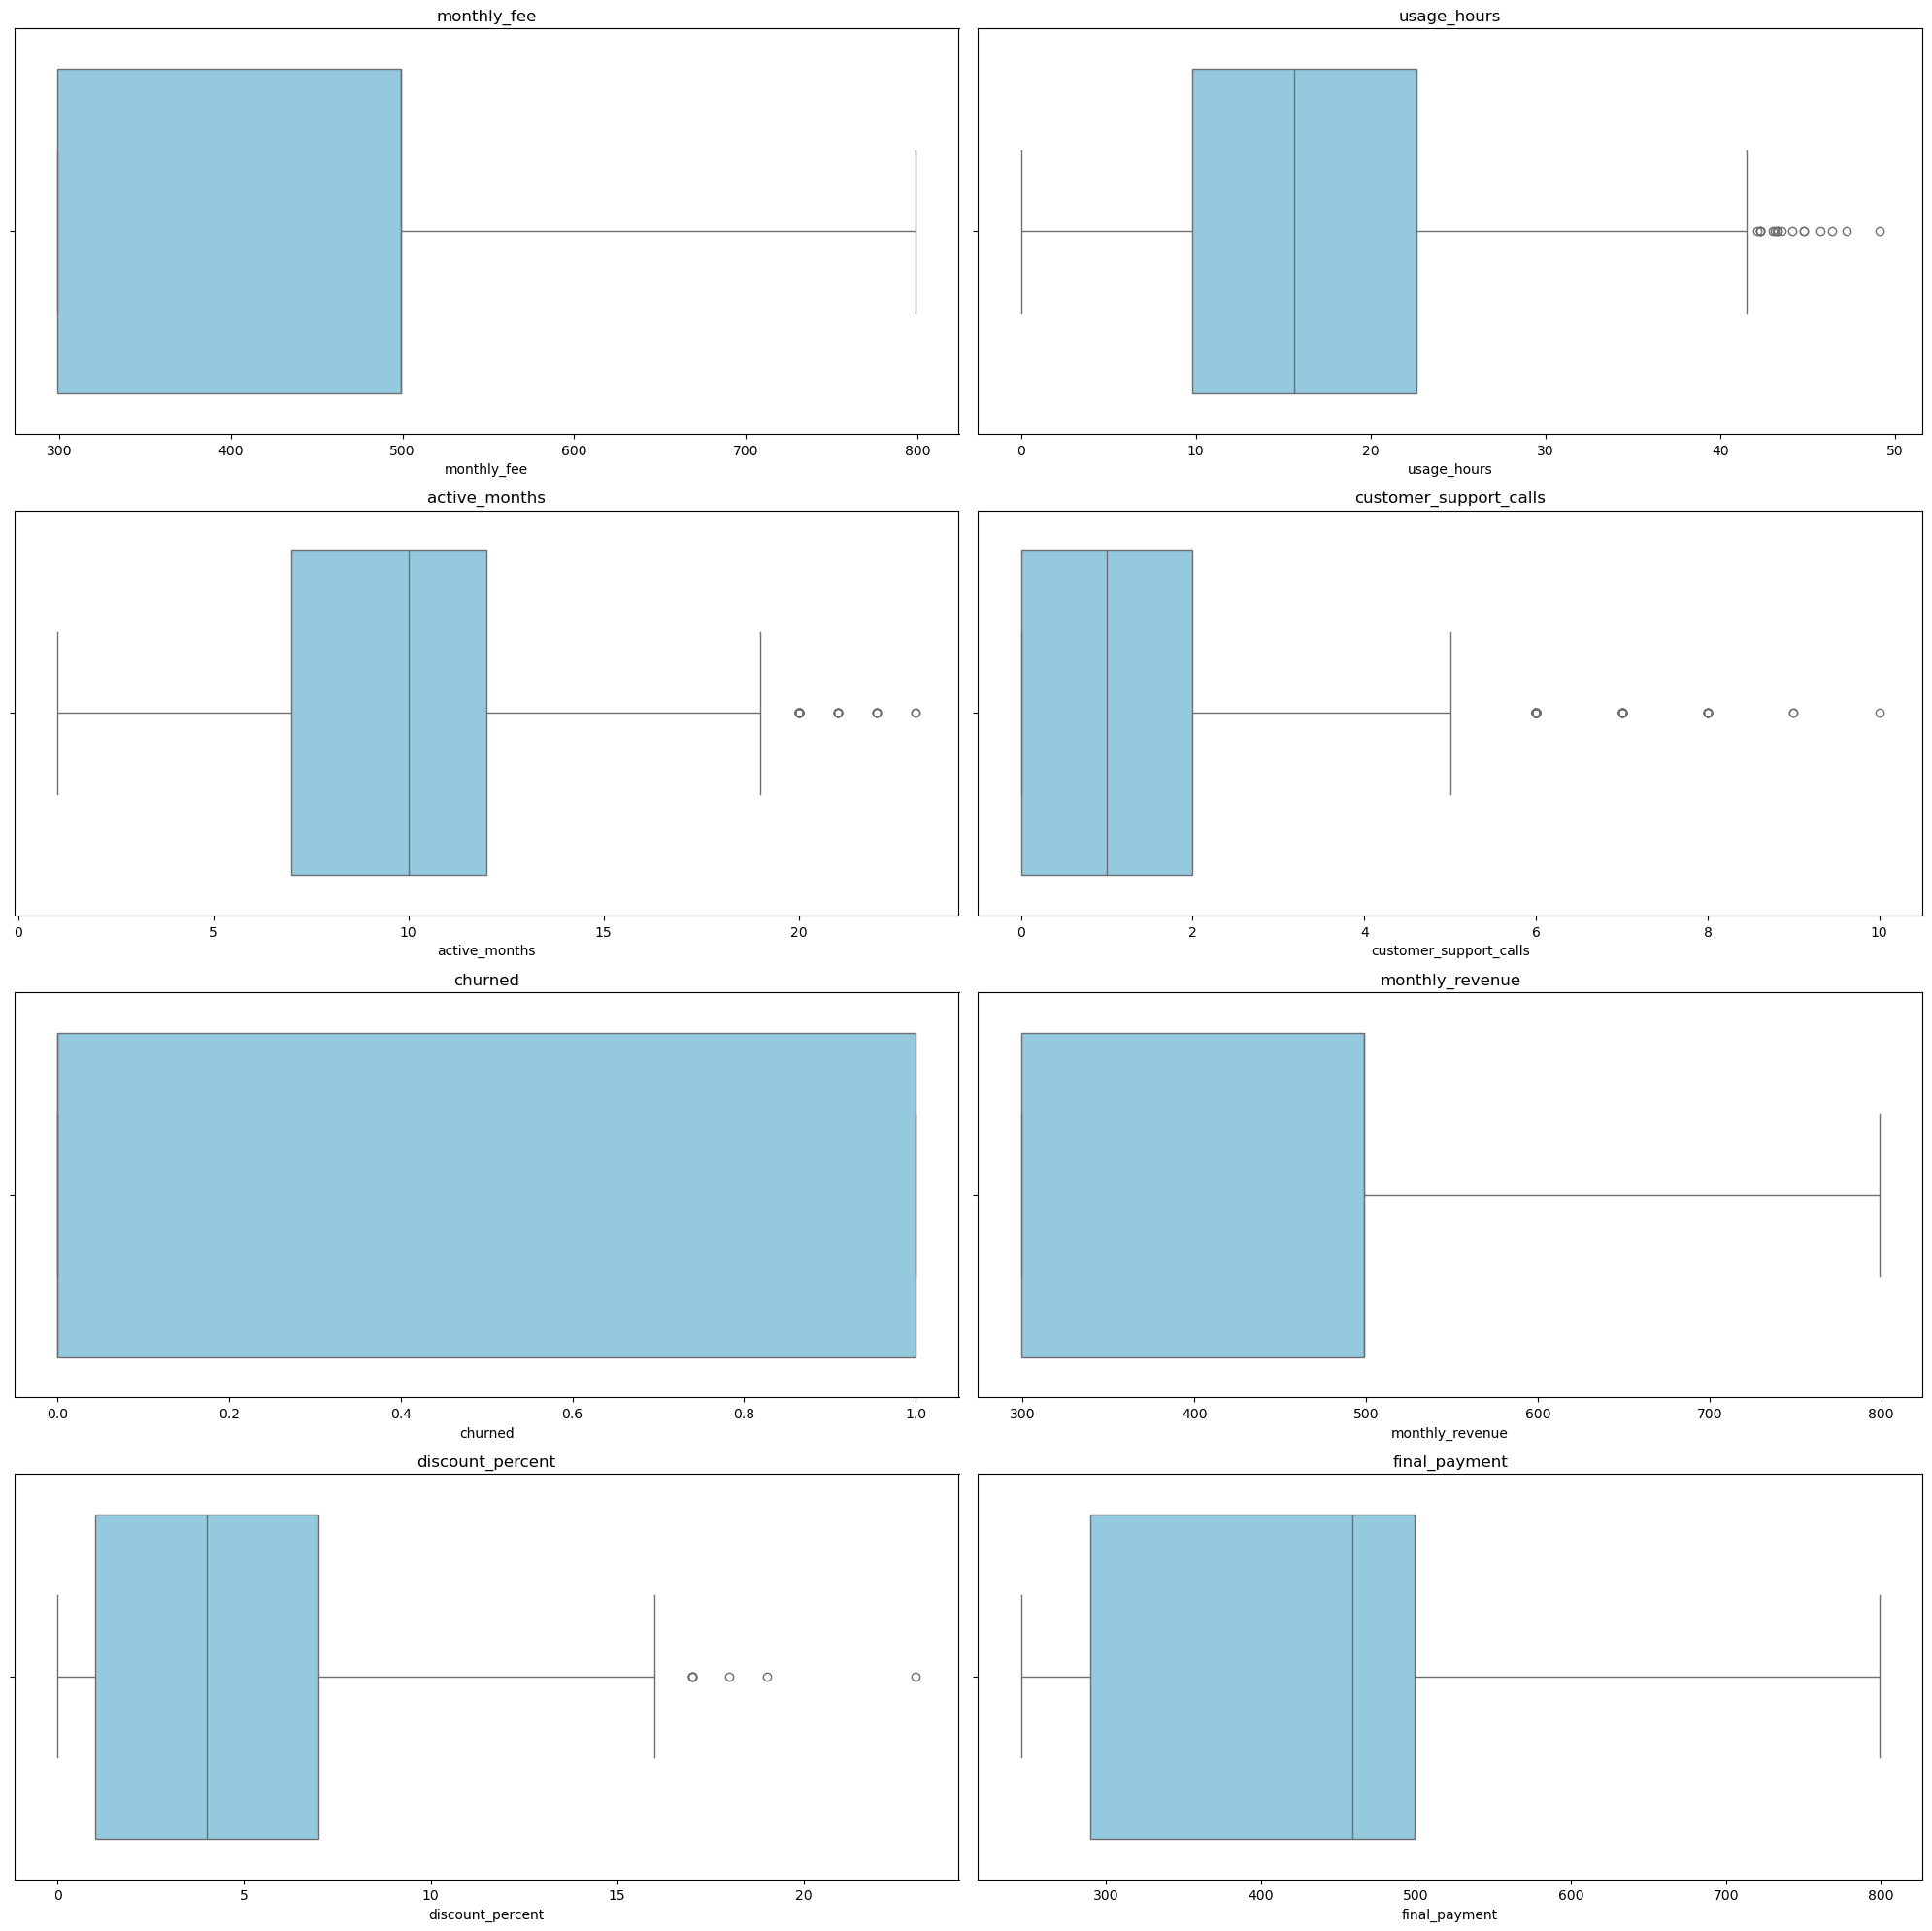

In [49]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [52]:
num_col = ['monthly_fee', 'usage_hours', 'active_months', 
           'customer_support_calls', 'churned', 
           'monthly_revenue', 'discount_percent', 'final_payment']

for col in num_col:
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

monthly_fee: 0 outliers
usage_hours: 18 outliers
active_months: 35 outliers
customer_support_calls: 84 outliers
churned: 0 outliers
monthly_revenue: 0 outliers
discount_percent: 8 outliers
final_payment: 0 outliers


In [56]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

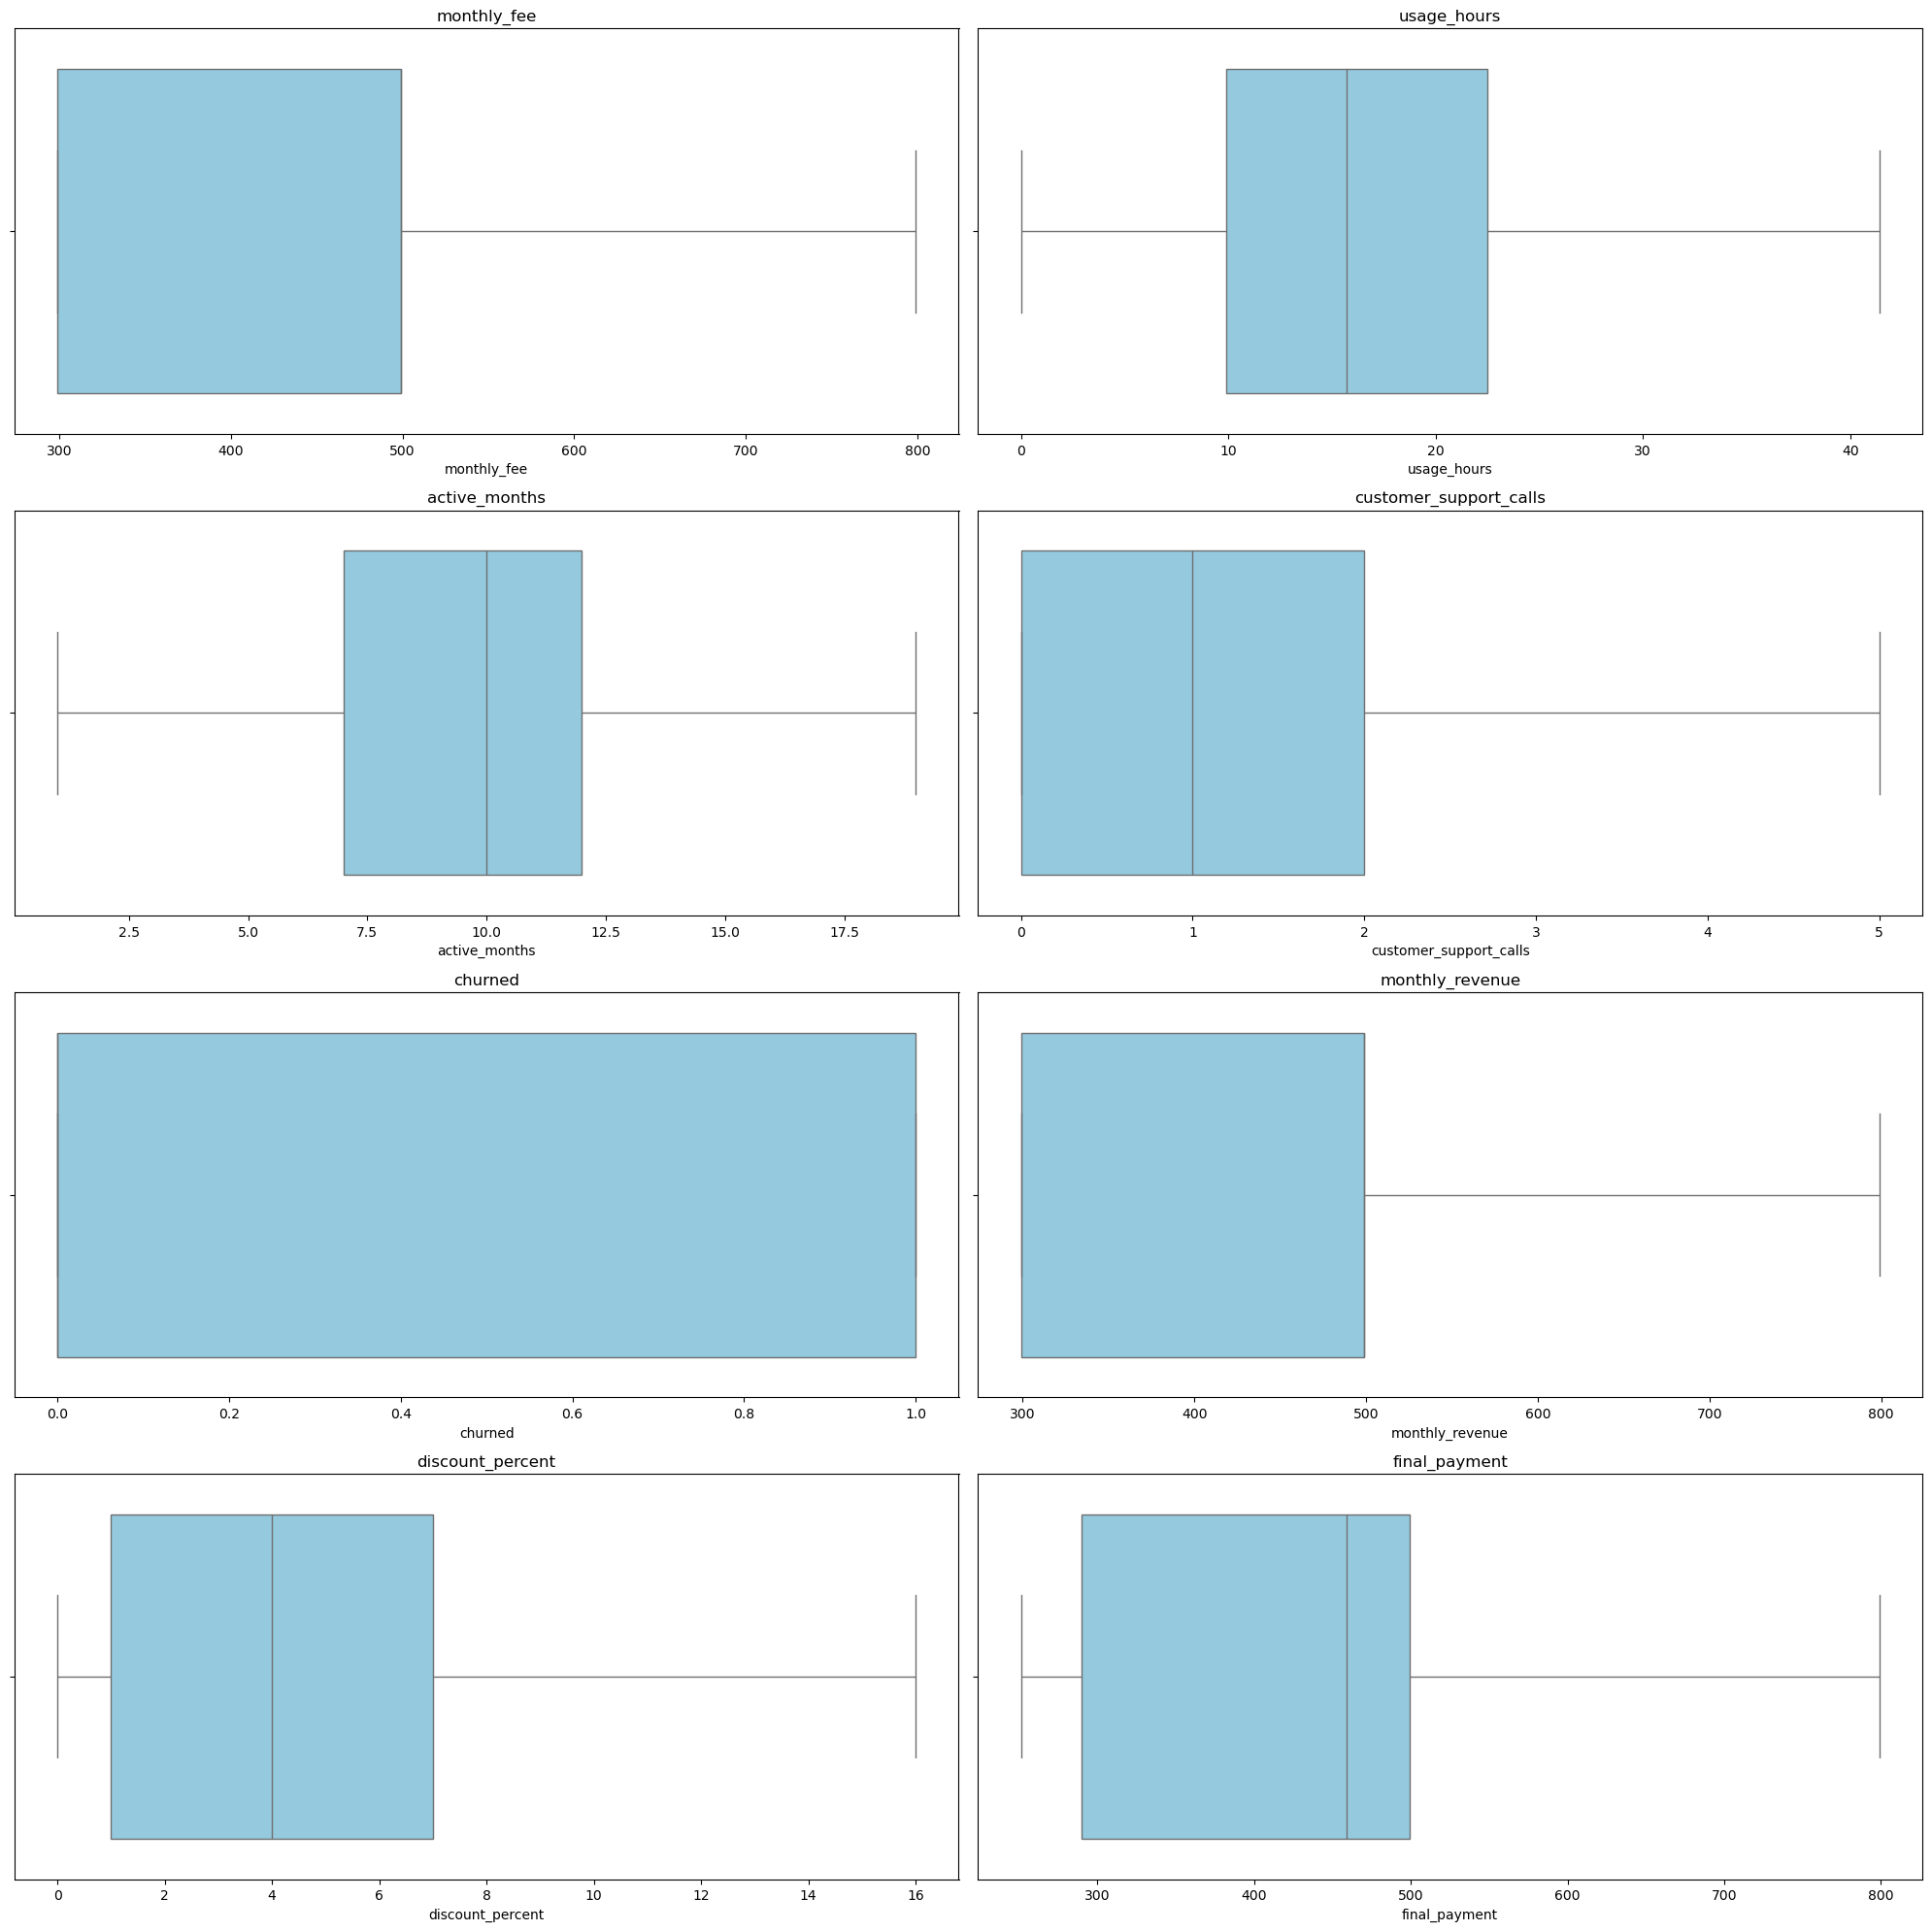

In [58]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

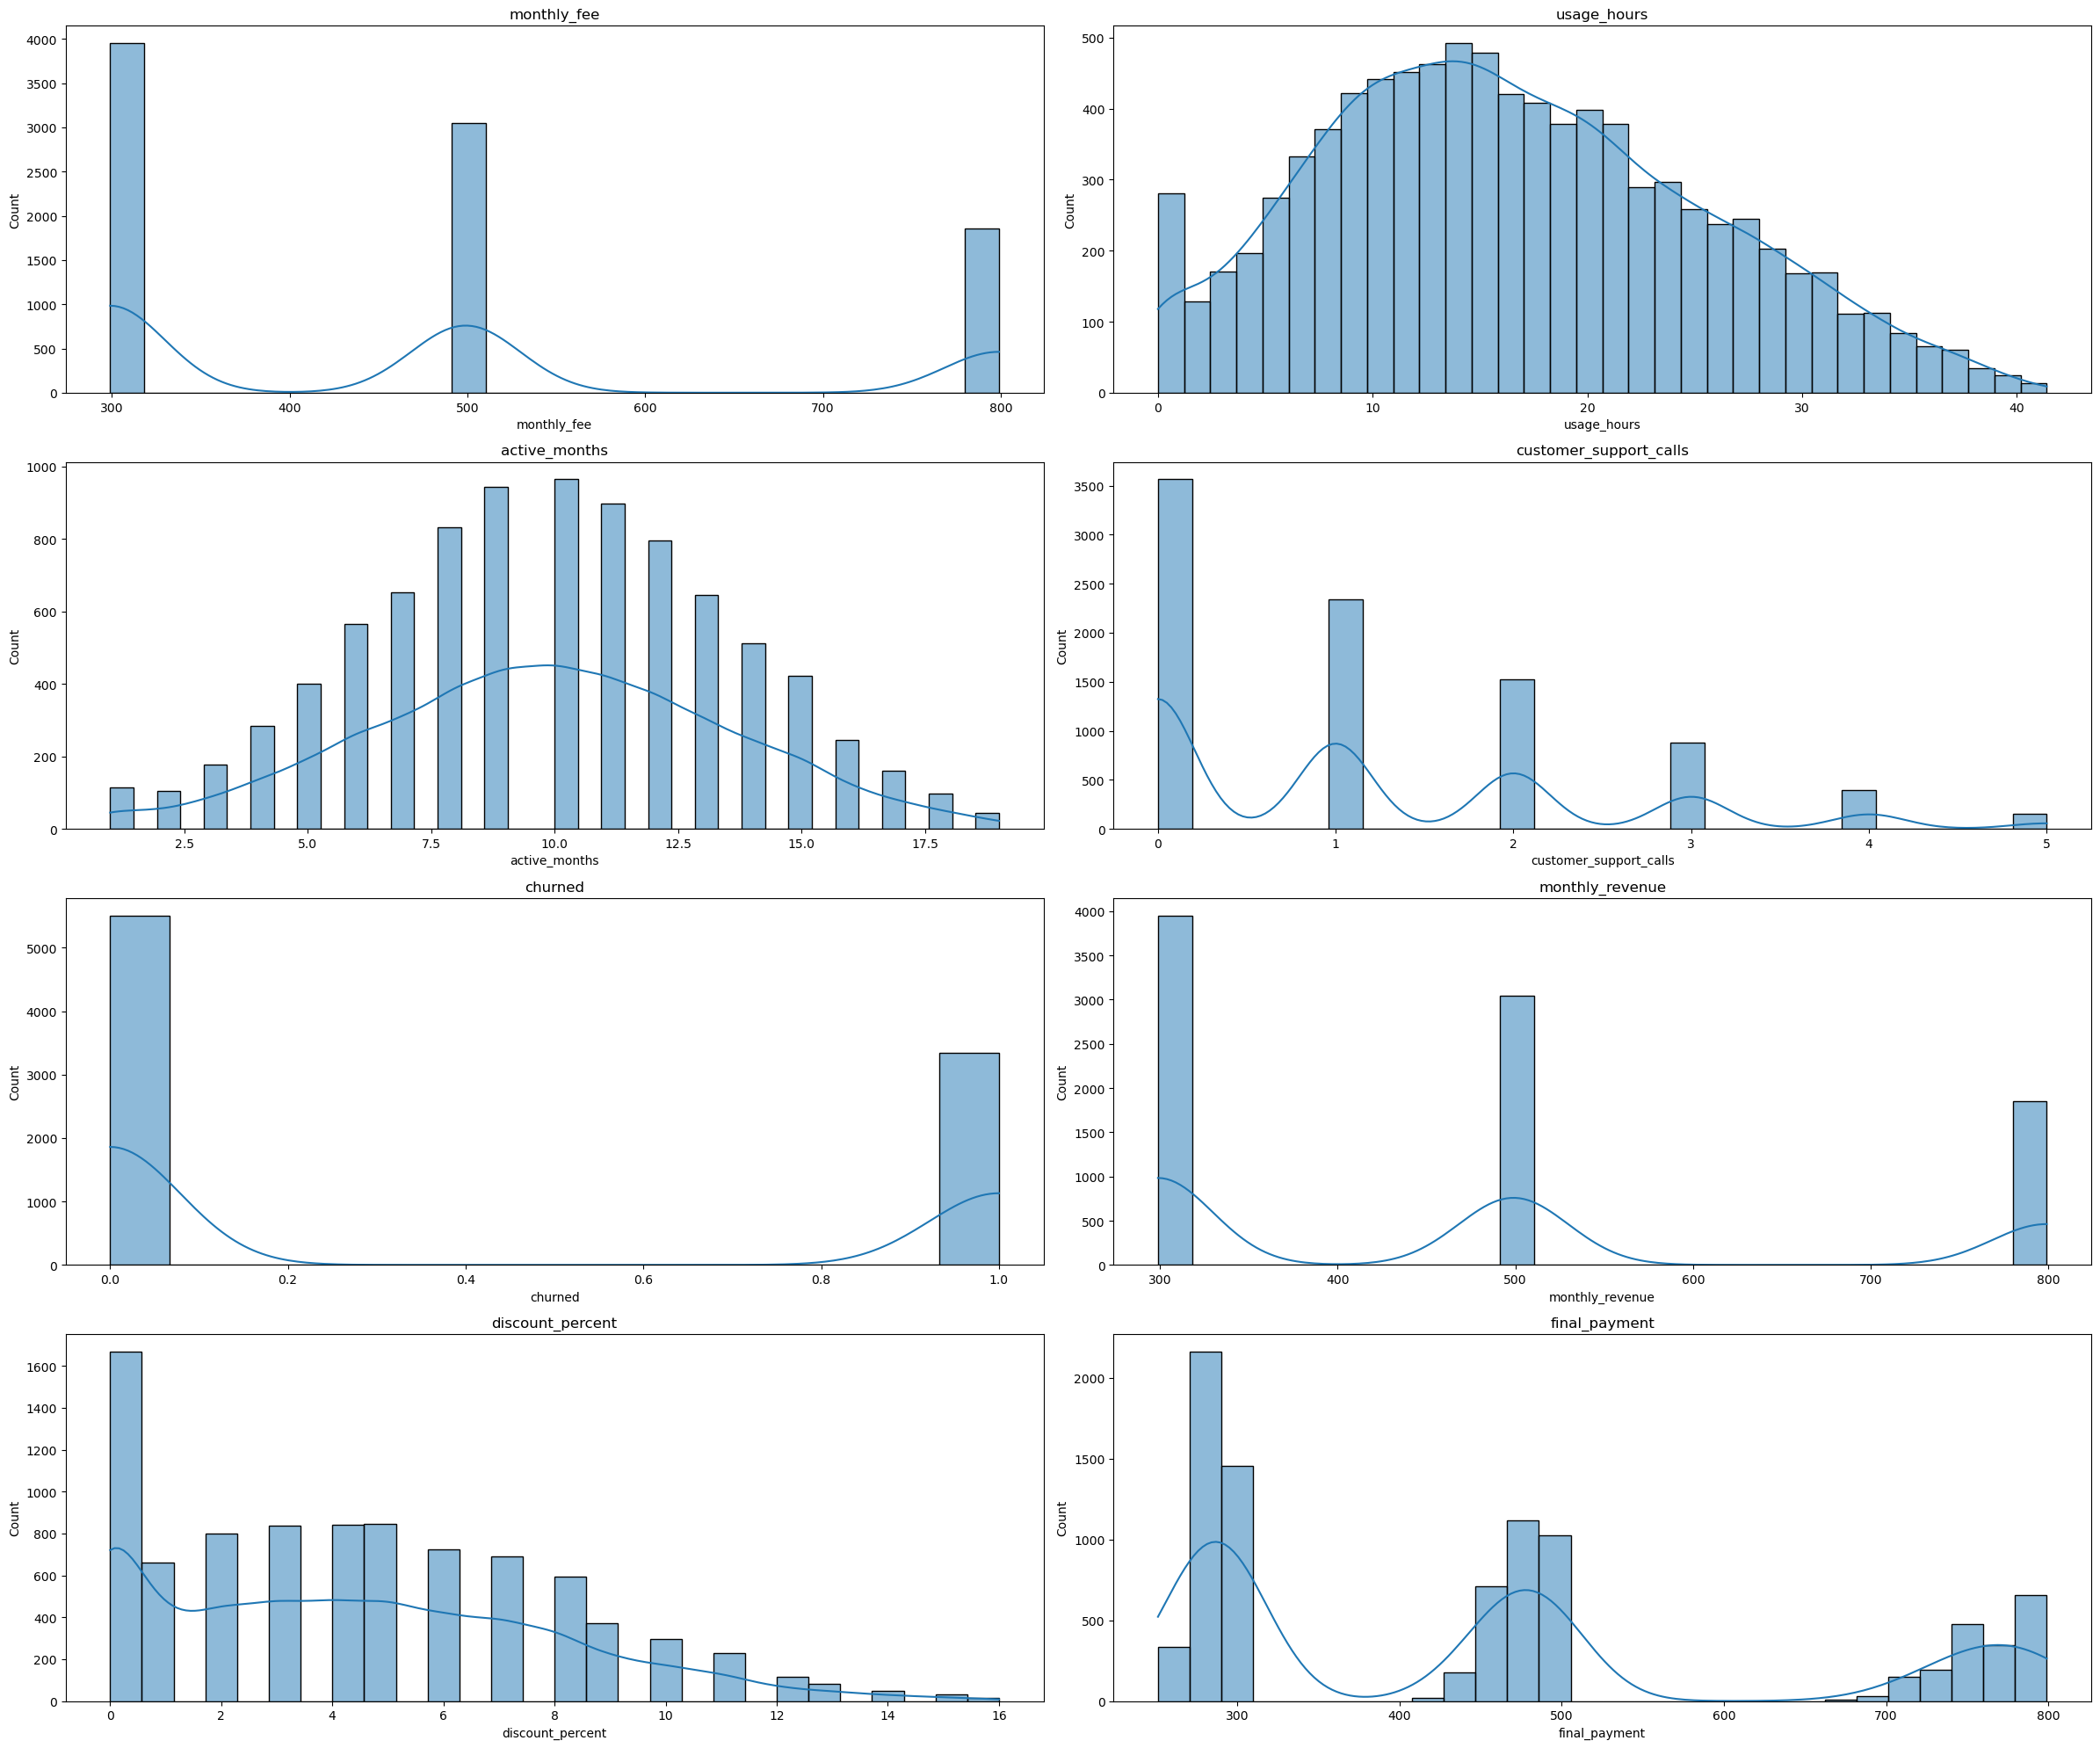

In [60]:
fig, axes = plt.subplots(4, 2, figsize=(24, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(x=df[col], ax=axes[i], palette='Set1', kde=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## 1. Monthly Fee
- The monthly fee distribution shows three clear peaks at ₹299, ₹499, and ₹799, representing different subscription plans.
- Most users are subscribed to the lower-tier plan, making the distribution trimodal and discrete.

## 2. Usage Hours
- Usage hours are right-skewed, with most users spending between 10 and 30 hours on the platform.
- A small number of users show higher engagement levels, extending the tail to the right.

## 3. Active Months
- The active months distribution follows a roughly normal pattern, with most users active between 5 and 10 months.
- Few users remain active beyond a year, indicating typical short- to mid-term engagement.

## 4. Customer Support Calls
- Most users make fewer than two support calls, showing minimal need for assistance.
- Only a small group contacts support more frequently, possibly indicating dissatisfaction or technical issues.

## 5. Churned
- The churn variable appears imbalanced, with a higher concentration of non-churned customers.
- This suggests most users continue their subscription rather than leaving.

## 6. Monthly Revenue
- Monthly revenue mirrors the fee structure, showing three peaks that align with the different pricing plans.
- Higher-priced plans contribute less to total count but likely more to overall revenue.

## 7. Discount Percent
- Discounts are generally low, with most users receiving between 0–5% off.
- Only a few customers enjoy higher discounts, creating a right-skewed pattern.

## 8. Final Payment
- The final payment distribution is trimodal, reflecting the combined effect of different fees and discounts.
- Most payments fall in three main clusters, likely corresponding to the three subscription levels.

In [63]:
from sklearn.preprocessing import LabelEncoder  
leb = LabelEncoder() 
cols = ['subscription_plan','auto_renew', 'region', 'churn_reason','churned']
for col in cols:
    df[col] = leb.fit_transform(df[col])

In [65]:
df.head()

,subscription_plan,monthly_fee,usage_hours,active_months,auto_renew,region,customer_support_calls,churned,churn_reason,monthly_revenue,discount_percent,final_payment
0,2,499,4.1,8,1,1,4,1,1,499,8,459.08
1,1,799,26.7,11,1,5,0,0,4,799,11,711.11
2,0,299,12.6,11,1,1,2,0,4,299,0,299.00
3,2,499,19.8,10,0,1,0,0,4,499,8,459.08
4,0,299,0.0,9,1,4,2,0,4,299,9,272.09


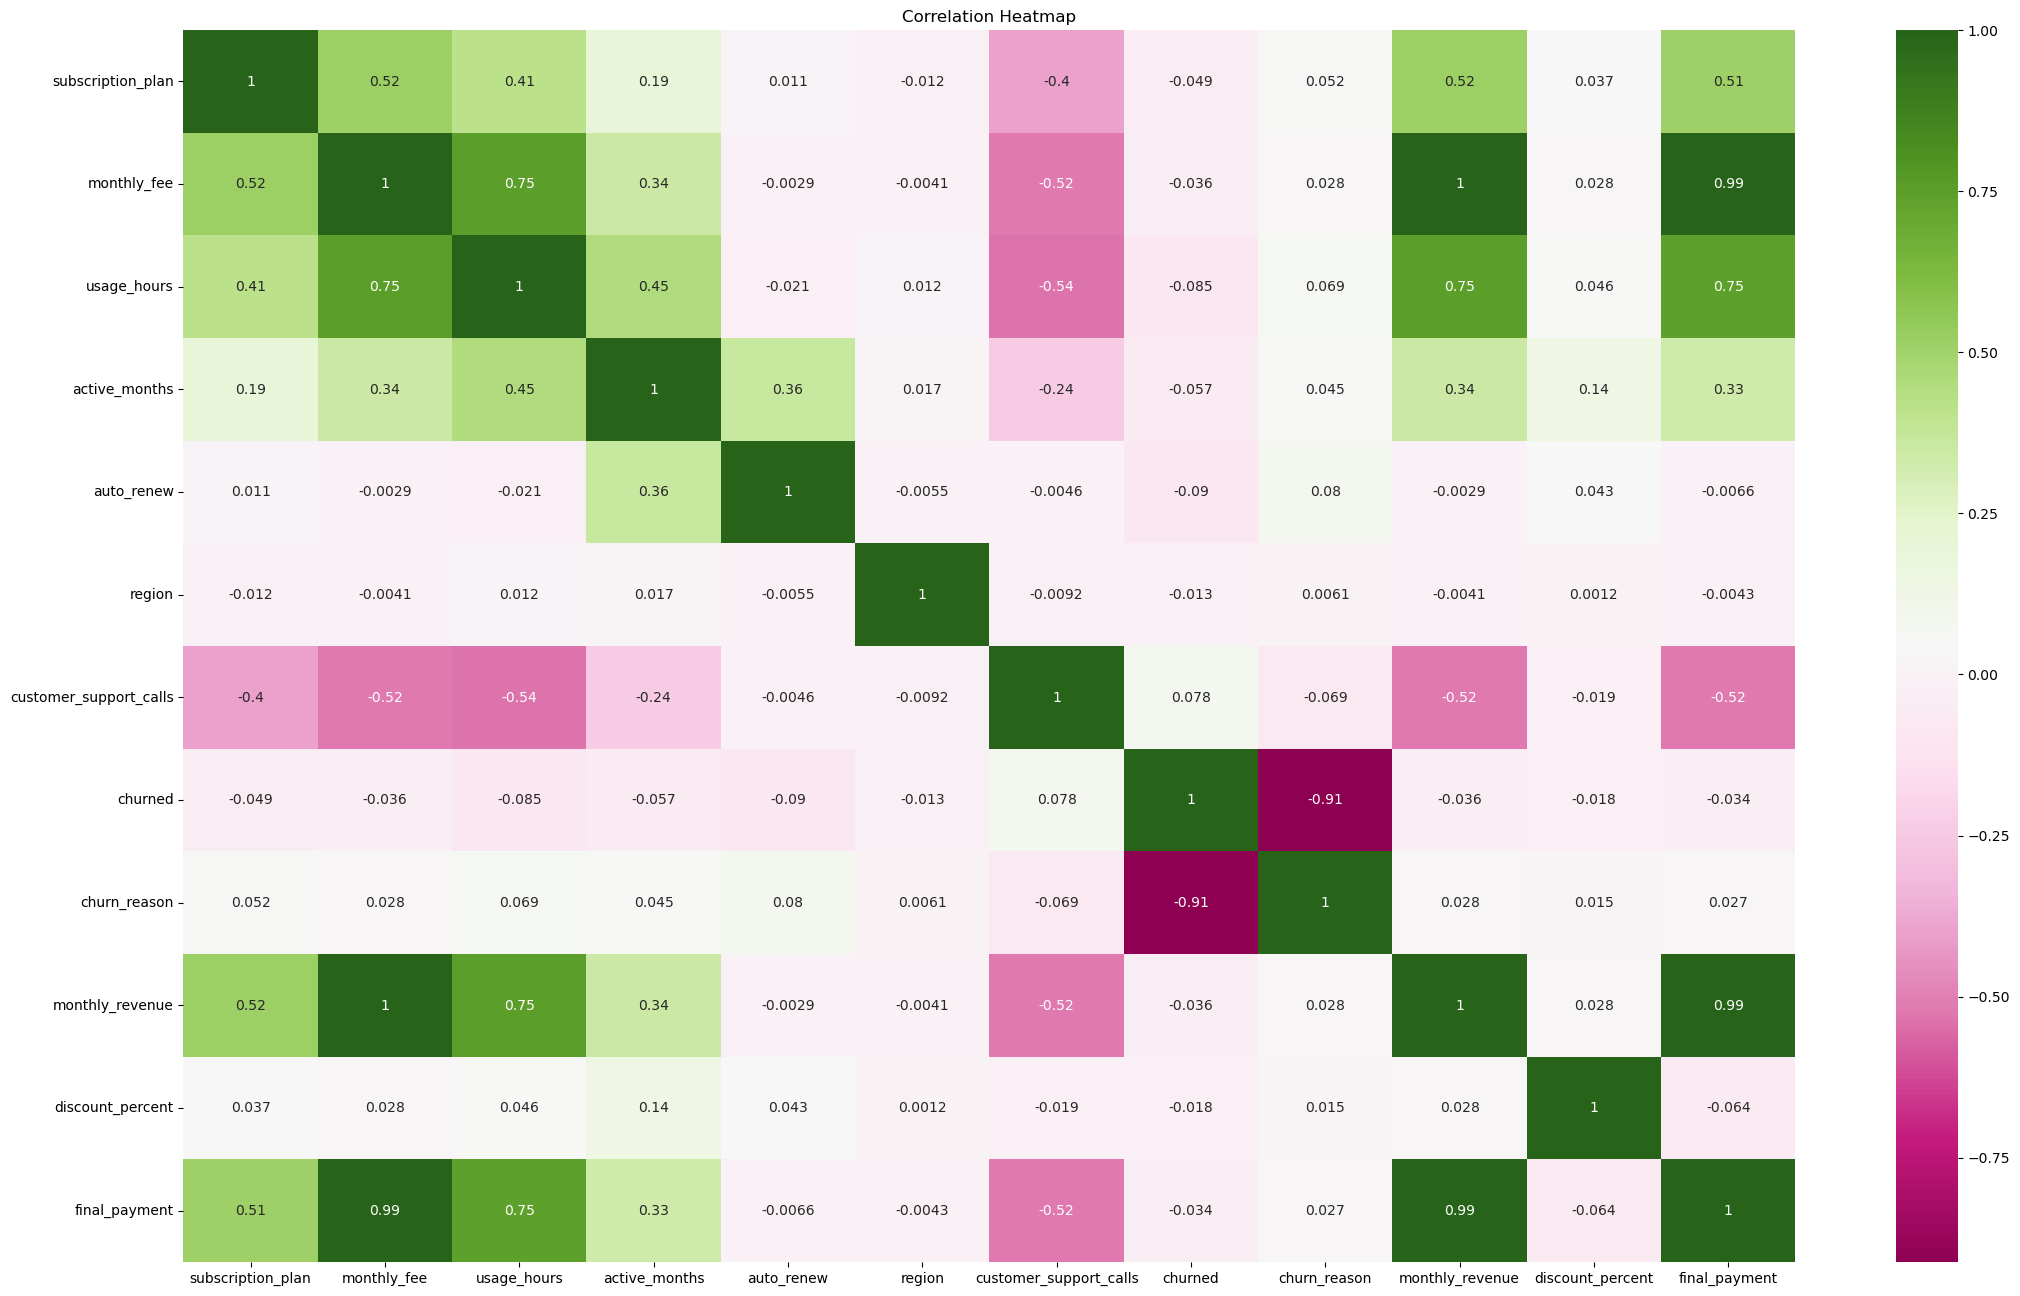

In [71]:
all_cols = df.columns
plt.figure(figsize=(26, 16))
sns.heatmap(df[all_cols].corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

- Monthly Fee, Monthly Revenue, and Final Payment are strongly positively correlated (≈ 0.99), showing that these financial variables move together.
- Subscription Plan also has a high positive relationship with Monthly Fee and Final Payment, confirming that higher-tier plans lead to higher payments.
- Usage Hours show moderate positive correlation with Monthly Revenue and Subscription Plan, meaning users with higher plans tend to use the service more.
- Active Months have a slight positive correlation with Usage Hours, suggesting that consistent usage contributes to longer retention.
- Customer Support Calls are negatively correlated with most revenue-related variables (around -0.5), implying that users needing more support may spend less or be less satisfied.
- Churned and Churn Reason show a strong negative correlation (-0.91) — as expected, since churn reason directly indicates user cancellation.
- Discount Percent has weak correlation with all variables, showing that discounts don’t significantly affect other features.

In [74]:
from sklearn.preprocessing import RobustScaler
num_cols = ['monthly_fee', 'usage_hours', 'active_months', 
            'customer_support_calls', 'monthly_revenue', 
            'discount_percent', 'final_payment']

scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [76]:
from sklearn.model_selection import train_test_split
x = df.drop('churned', axis=1)
y = df['churned']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1377
           1       1.00      1.00      1.00       837

    accuracy                           1.00      2214
   macro avg       1.00      1.00      1.00      2214
weighted avg       1.00      1.00      1.00      2214



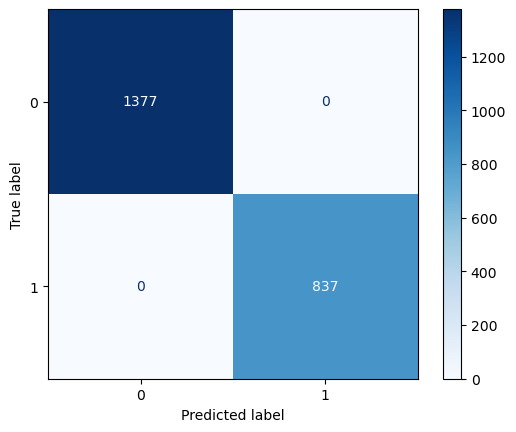

ROC-AUC Score: 1.0


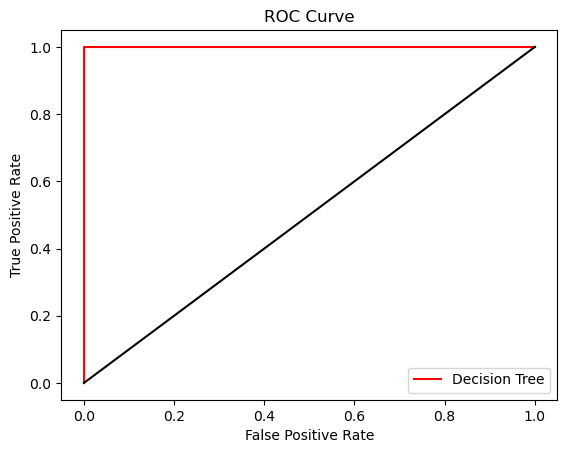

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve, accuracy_score
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap="Blues")
plt.show()
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))
fpr, tpr,_= roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr, label="Decision Tree", color="red")
plt.plot([0,1], [0,1], '-', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Accuracy score : 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1377
           1       1.00      1.00      1.00       837

    accuracy                           1.00      2214
   macro avg       1.00      1.00      1.00      2214
weighted avg       1.00      1.00      1.00      2214



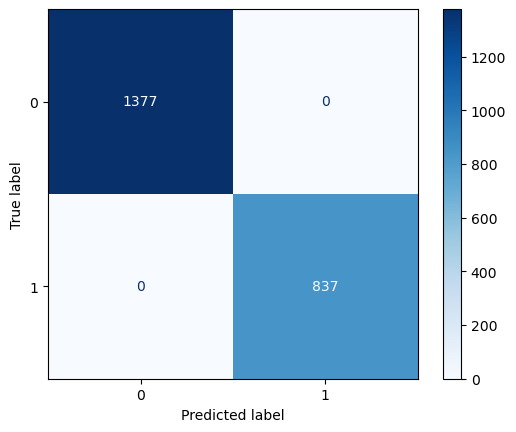

ROC-AUC Score: 1.0


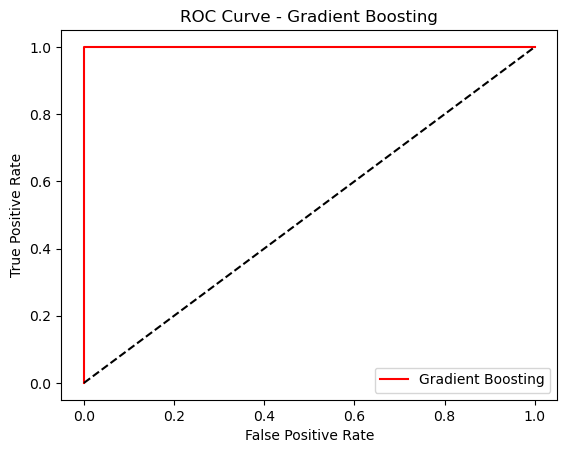

In [88]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]
print('Accuracy score :', accuracy_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="Blues")
plt.show()
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_gb))
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr, label="Gradient Boosting", color="red")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1377
           1       1.00      1.00      1.00       837

    accuracy                           1.00      2214
   macro avg       1.00      1.00      1.00      2214
weighted avg       1.00      1.00      1.00      2214



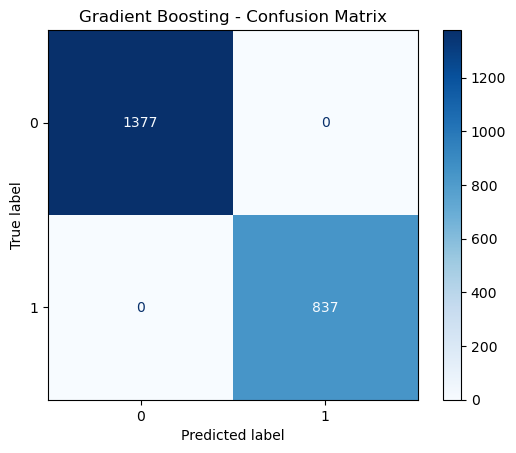

ROC-AUC Score: 1.0


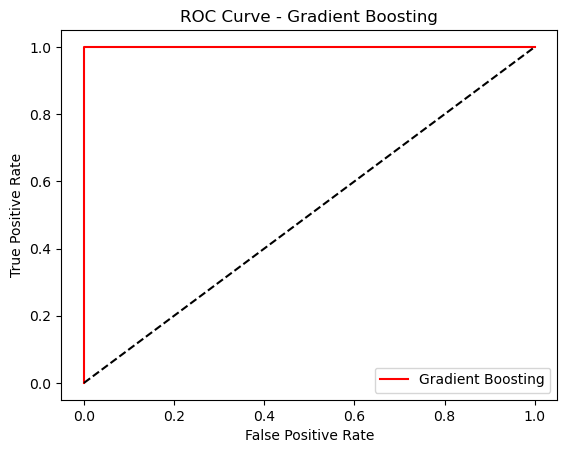

In [84]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]
print("Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, cmap="Blues")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_gb))
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
plt.plot(fpr, tpr, label="Gradient Boosting", color="red")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1377
           1       1.00      1.00      1.00       837

    accuracy                           1.00      2214
   macro avg       1.00      1.00      1.00      2214
weighted avg       1.00      1.00      1.00      2214



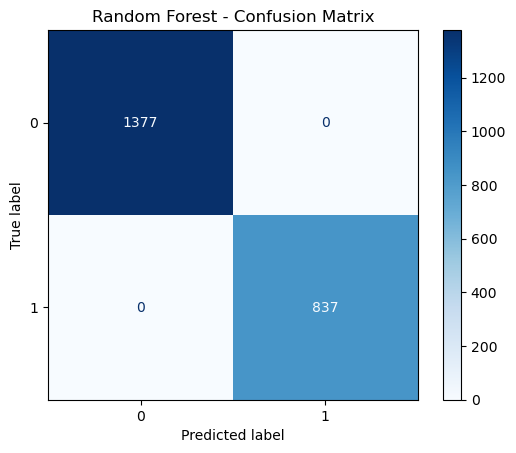

ROC-AUC Score: 1.0


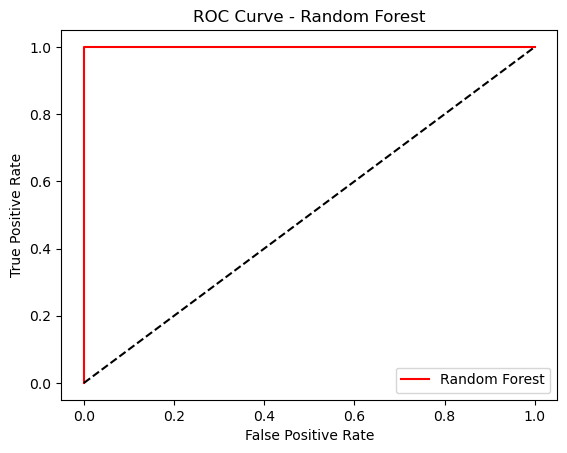

In [94]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label="Random Forest", color="red")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()